In [1]:
%load_ext autoreload
import uproot as ut
import utils
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np
import vector

from tqdm import tqdm

from utils.cutConfig import *
%autoreload 2

In [2]:
filename = "../signal/NanoAOD/NMSSM_XYH_YToHH_6b_MX_700_MY_400_accstudies_500k_May2021.root:sixBtree"
ttree = ut.open(filename)
branches = utils.Branches(ttree)
preselection = utils.Selection(branches,cuts={"njetcut":6},tag="preselection")
sixb_in_preselection = preselection.nsixb_selected == 6
print(preselection)
baseline = utils.Selection(branches,mask=sixb_in_preselection,variable="jet_btag",include=preselection,tag="baseline")
print(baseline)

--- all preselection ---
Event Efficiency:      0.74
Event Selected Purity: 0.29
--- all baseline / btag ---
Event Efficiency:      0.29
Event Selected Purity: 1.00


In [3]:
baseline_6jets = utils.Selection(branches,cuts={},variable="jet_btag",njets=6,tag="baseline",include=baseline)
print(baseline_6jets)

--- 6 baseline / btag ---
Event Efficiency:      1.0
Event Selected Purity: 0.70


--- all baseline / btag ---
Event Efficiency:      0.29
Event Selected Purity: 1.00
0.70 & 0.88 & 0.96 & 0.99


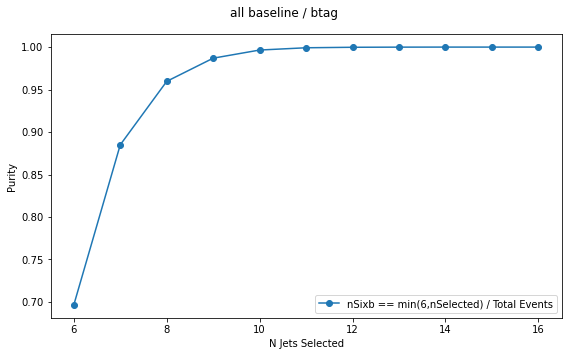

In [4]:
utils.selection_study(baseline,saveas="baseline",latex=1)

In [5]:
baseline_8jets = utils.Selection(branches,cuts={},variable="jet_btag",njets=9,tag="baseline",include=baseline)
print(baseline_8jets)

--- 9 baseline / btag ---
Event Efficiency:      1.0
Event Selected Purity: 0.99


# Trial Jet Selections

In [6]:
first_jet40pt = utils.Selection(branches,cuts={"ptcut":40},variable="jet_btag",njets=-1,tag="jet 40pt",include=baseline)

--- all jet 40pt / btag ---
Event Efficiency:      1.0
Event Selected Purity: 0.41


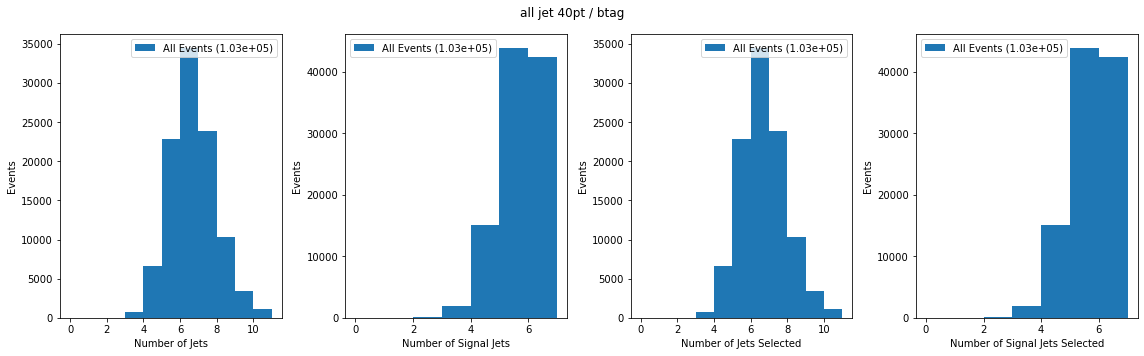

--- all jet 40pt / btag ---
Event Efficiency:      1.0
Event Selected Purity: 0.41


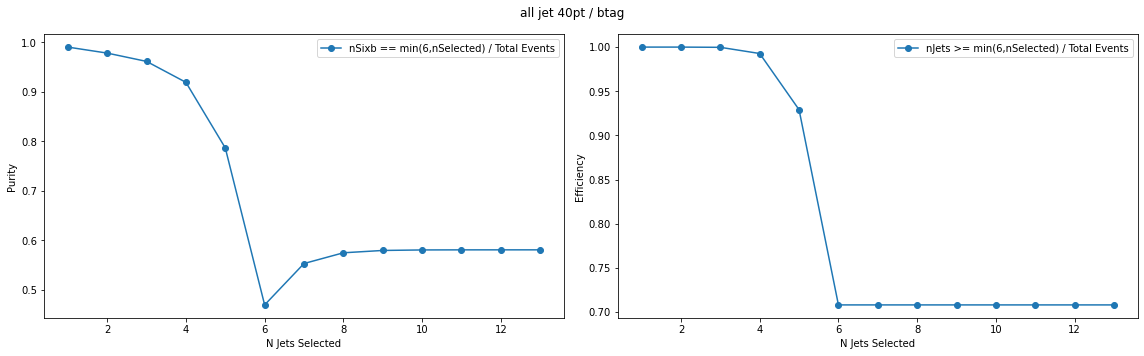

In [7]:
utils.njet_study(first_jet40pt)
utils.selection_study(first_jet40pt,under6=1,required=1)

In [8]:
first_jet40pt_mbtag = utils.Selection(branches,cuts={"ptcut":40,"btagcut":jet_btagWP[mediumWP]},variable="jet_btag",njets=-1,tag="jet 40pt mbtag",include=baseline)

--- all jet 40pt mbtag / btag ---
Event Efficiency:      1.0
Event Selected Purity: 0.12


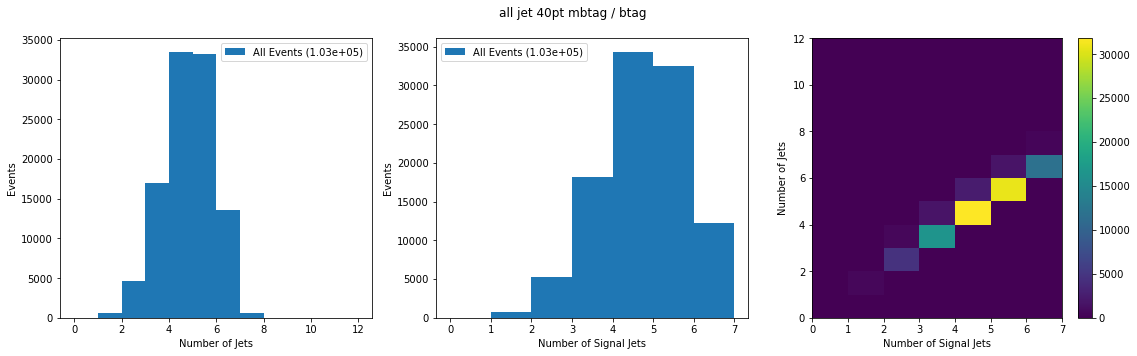

--- all jet 40pt mbtag / btag ---
Event Efficiency:      1.0
Event Selected Purity: 0.12


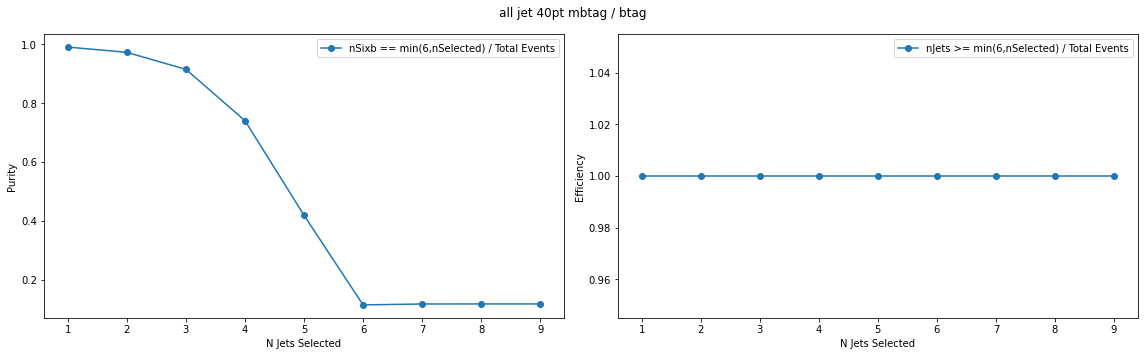

In [9]:
utils.njet_study(first_jet40pt_mbtag)
utils.selection_study(first_jet40pt_mbtag,under6=1)

In [10]:
first_2jet40pt_mbtag = first_jet40pt_mbtag.passed_jets(cuts={"njetcut":2},variable="jet_btag",njets=2)
first_3jet40pt_mbtag = first_jet40pt_mbtag.passed_jets(cuts={"njetcut":3},variable="jet_btag",njets=3)
first_4jet40pt_mbtag = first_jet40pt_mbtag.passed_jets(cuts={"njetcut":4},variable="jet_btag",njets=4)

In [11]:
second_f2j = utils.Selection(branches,cuts={"njetcut":4},variable="jet_btag",njets=-1,tag="remaining",previous=first_2jet40pt_mbtag,include=baseline)
second_f3j = utils.Selection(branches,cuts={"njetcut":3},variable="jet_btag",njets=-1,tag="remaining",previous=first_3jet40pt_mbtag,include=baseline)
second_f4j = utils.Selection(branches,cuts={"njetcut":2},variable="jet_btag",njets=-1,tag="remaining",previous=first_4jet40pt_mbtag,include=baseline)

--- 2 jet 40pt mbtag / btag | all remaining / btag merged ---
Event Efficiency:      0.99
Event Selected Purity: 1.00
0.70 & 0.89 & 0.96 & 0.99


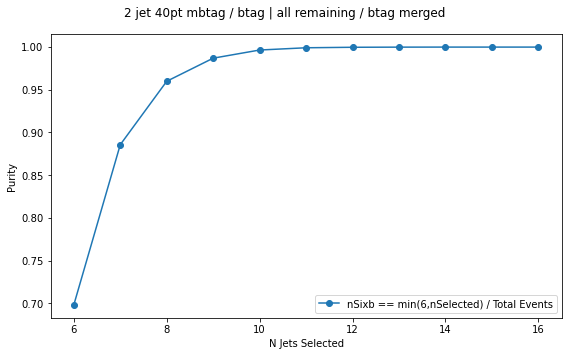

--- 3 jet 40pt mbtag / btag | all remaining / btag merged ---
Event Efficiency:      0.95
Event Selected Purity: 1.00
0.71 & 0.89 & 0.96 & 0.99


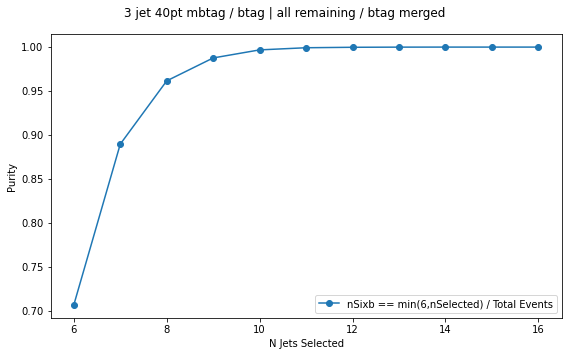

--- 4 jet 40pt mbtag / btag | all remaining / btag merged ---
Event Efficiency:      0.78
Event Selected Purity: 1.00
0.73 & 0.90 & 0.97 & 0.99


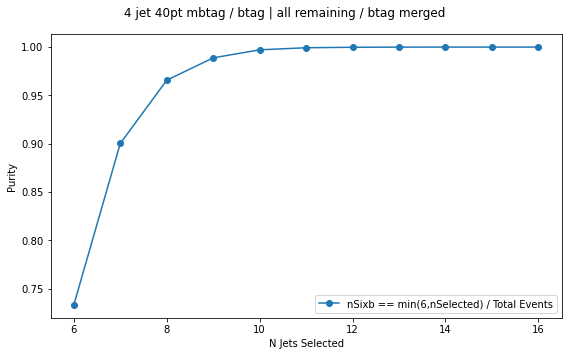

In [12]:
utils.selection_study(second_f2j.merge(),saveas="2jet40",latex=1)
utils.selection_study(second_f3j.merge(),saveas="3jet40",latex=1)
utils.selection_study(second_f4j.merge(),saveas="4jet40",latex=1)

In [13]:
second_f2j_4rj = second_f2j.selected_njets(4)
second_f3j_3rj = second_f3j.selected_njets(3)
second_f4j_2rj = second_f4j.selected_njets(2)

In [14]:
print(baseline_6jets)
print(second_f2j_4rj.merge())
print(second_f3j_3rj.merge())
print(second_f4j_2rj.merge())

--- 6 baseline / btag ---
Event Efficiency:      1.0
Event Selected Purity: 0.70
--- 2 jet 40pt mbtag / btag | 4 remaining / btag merged ---
Event Efficiency:      0.99
Event Selected Purity: 0.70
--- 3 jet 40pt mbtag / btag | 3 remaining / btag merged ---
Event Efficiency:      0.95
Event Selected Purity: 0.71
--- 4 jet 40pt mbtag / btag | 2 remaining / btag merged ---
Event Efficiency:      0.78
Event Selected Purity: 0.73


In [15]:
second_f2j_6rj = second_f2j.selected_njets(4+3)
second_f3j_5rj = second_f3j.selected_njets(3+3)
second_f4j_4rj = second_f4j.selected_njets(2+3)

In [16]:
print(baseline_8jets)
print(second_f2j_6rj.merge())
print(second_f3j_5rj.merge())
print(second_f4j_4rj.merge())

--- 9 baseline / btag ---
Event Efficiency:      1.0
Event Selected Purity: 0.99
--- 2 jet 40pt mbtag / btag | 7 remaining / btag merged ---
Event Efficiency:      0.99
Event Selected Purity: 0.99
--- 3 jet 40pt mbtag / btag | 6 remaining / btag merged ---
Event Efficiency:      0.95
Event Selected Purity: 0.99
--- 4 jet 40pt mbtag / btag | 5 remaining / btag merged ---
Event Efficiency:      0.78
Event Selected Purity: 0.99
